# Maryam Ahmadi

#  STAT 4650 Homework 2


### In this homework, we use logistic regression to predict the probability of default using income and balance on the Default data set. We will also estimate the test error of this logistic regression model using the validation set approach.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors 
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm

In [3]:
#Loading data
df = pd.read_csv('/Users/macintosh/Desktop/Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df.tail()

,default,student,balance,income
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365
9999,No,Yes,200.922183,16862.952321


#### 2.2.1 Number of Observations: </font>

In [5]:
df.shape

(10000, 4)

####  2.2.2	Field names

In [6]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

#### 2.2.3 Type of fields

In [7]:
Datatypes = {"Quantitative":['balance','income'], 'Qualitative':['default','student']}
quants = df[Datatypes['Quantitative']].astype(np.float_)
df = pd.concat([quants,df[Datatypes['Qualitative']]],axis = 1)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   balance  10000 non-null  float64
 1   income   10000 non-null  float64
 2   default  10000 non-null  object 
 3   student  10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [9]:
table = df.describe(include='all')
table

,balance,income,default,student
count,10000.000000,10000.000000,10000,10000
unique,NaN,NaN,2,2
top,NaN,NaN,No,No
freq,NaN,NaN,9667,7056
mean,835.374886,33516.981876,NaN,NaN
std,483.714985,13336.639563,NaN,NaN
min,0.000000,771.967729,NaN,NaN
25%,481.731105,21340.462903,NaN,NaN
50%,823.636973,34552.644802,NaN,NaN
75%,1166.308386,43807.729272,NaN,NaN


# (a) Fit a multiple logistic regression model that uses income and balance to predict default. [30 points]

## 3.1 Data Processing/Cleaning </font>

In [10]:
df.isna().sum()

balance    0
income     0
default    0
student    0
dtype: int64

In [11]:
df = df.drop(df[df.values == '?'].index)

In [12]:
df.isna().sum()

balance    0
income     0
default    0
student    0
dtype: int64

In [13]:
np.random.seed(123)
train = np.random.rand(len(df))< 0.85
df_train = df[train]
df_test = df[~train]
indep_variables = ['balance','income']
X_train = np.array(df[train][indep_variables])
Y_train = np.array(df[train]['default'])
X_test = np.array(df[~train][indep_variables])
Y_test = np.array(df[~train]['default'])
LGR = LogisticRegression()
Model_LGR = LGR.fit(X_train,Y_train )
y_pred = Model_LGR.predict(X_test)
confusion_mtx = confusion_matrix(Y_test,y_pred)


In [14]:
print(confusion_mtx)
score = Model_LGR.score(X_test, Y_test)
Error = 1- score
print('Accuracy=',score)
print('Test Error rate =',Error)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1383    1]
 [  49    0]]
Accuracy= 0.9651081646894627
Test Error rate = 0.0348918353105373
[[1383    1]
 [  49    0]]
              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1384
         Yes       0.00      0.00      0.00        49

   micro avg       0.97      0.97      0.97      1433
   macro avg       0.48      0.50      0.49      1433
weighted avg       0.93      0.97      0.95      1433



### Although the overal accuracy is very high and test error rate is only 3%, this model is unable to detect default customers. This might happen because of imbalanced dataset.

<IPython.core.display.Javascript object>


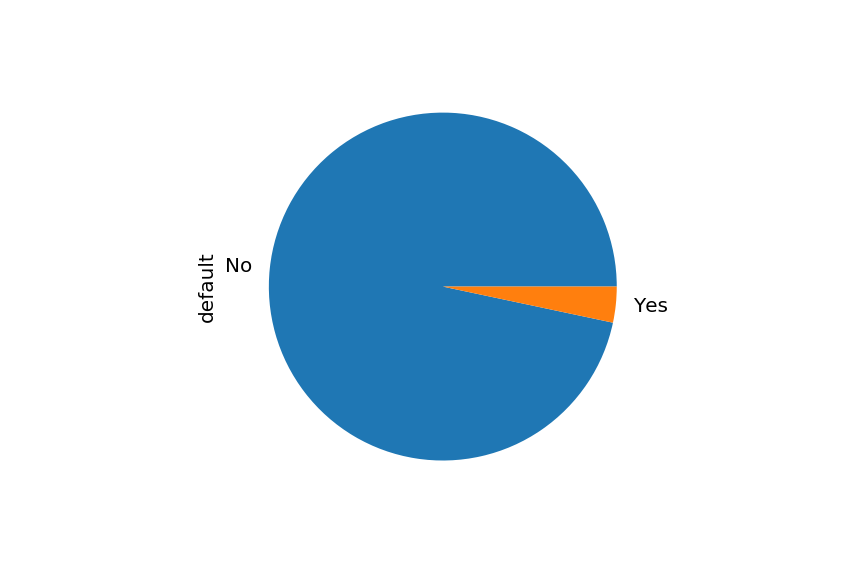

In [35]:
df['default'].value_counts().plot(kind='pie')

### The dataset is imbalanced, so sampling methods should be implemented.

### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
#### i. Split the sample set into a training set and a validation set.
#### ii. Fit a multiple logistic regression model using only the training observations.
#### iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
#### iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [15]:
def logistic_validation_error(dataFrame, variables, response):
    
    # i. Split the sample set into a training set and a validation set.
    indices = np.random.rand(len(dataFrame))< 0.5
    training = df[indices]
    validation = df[~indices]
    
    # ii. Fit a multiple logistic regression model using only the training observations.
    X_train = sm.add_constant(training[indep_variables])
    y_train = [1 if el=='Yes' else 0 for el in training[response].values]
    
    X_validation = sm.add_constant(validation[indep_variables])
    y_validation = [1 if el=='Yes' else 0 for el in validation[response].values]

    train_model = sm.Logit(y_train,X_train)
    train_logit = train_model.fit()
    
    # Compare Predictions with Validation Set 
    # Set the  responses posterior probability threshold to 0.5 
    y_predicted = np.array(train_logit.predict(X_validation) > 0.5, dtype=float)

    error_rate = np.mean(y_predicted != y_validation)
    
    return error_rate
    return print(confusion_matrix(y_validation, y_predicted),error_rate)

np.random.seed(100)
logistic_validation_error(df,['balance', 'income'], ['default'])

Optimization terminated successfully.
         Current function value: 0.079449
         Iterations 10


0.026809111066317275

#### iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [16]:
validation_error = np.array([])
for i in range(101,104):
    # set the random seed to different values so we get different splits of the data
    np.random.seed(i)
    # call logistic_validation_mse function
    validation_error = np.append(validation_error, logistic_validation_error(df,['balance', 'income'], ['default']))

print('Error_Rate =', validation_error)

Optimization terminated successfully.
         Current function value: 0.085819
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082559
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085814
         Iterations 10
Error_Rate = [0.02427861 0.02502503 0.02416503]


### With different splits we get a slight different error rate as it gets different samples for training the model. Since there is not much of variablity among models, we can say the method is stable.